<a href="https://colab.research.google.com/github/MakiResearchTeam/MakiFlow-Tutorials/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade git+https://github.com/oKatanaaa/MakiFlow.git@beta_v1.0

  Cloning https://github.com/oKatanaaa/MakiFlow.git (to revision beta_v1.0) to /tmp/pip-req-build-kcwle5c_
  Running command git clone -q https://github.com/oKatanaaa/MakiFlow.git /tmp/pip-req-build-kcwle5c_
  Running command git checkout -b beta_v1.0 --track origin/beta_v1.0
  Switched to a new branch 'beta_v1.0'
  Branch 'beta_v1.0' set up to track remote branch 'beta_v1.0' from 'origin'.
  Created wheel for MakiFlow: filename=MakiFlow-1.2.0-cp36-none-any.whl size=279365 sha256=d5a02d94abd04bf1a1eadc2aa6a204184a25e93cdd93de3838973cefa7d907aa
  Stored in directory: /tmp/pip-ephem-wheel-cache-gn7f4vkd/wheels/dc/a4/48/64e0bbd730bde4ea9ba884251181add2fd1a99b176a97fc153
Successfully built MakiFlow
  Found existing installation: MakiFlow 1.2.0
    Uninstalling MakiFlow-1.2.0:
      Successfully uninstalled MakiFlow-1.2.0


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
# Download and preprocess data

In [4]:
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [5]:
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

In [6]:
X_mean, X_std = Xtrain.mean(axis=(0, 1, 2)), Xtrain.std(axis=(0, 1, 2))

Xtrain = (Xtrain - X_mean) / X_std
Xtest = (Xtest - X_mean) / X_std

Ytrain = Ytrain.reshape(-1)
Ytest = Ytest.reshape(-1)

# Create a model

In [7]:
from makiflow.layers import *
from makiflow.models import Classificator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# Each layer requires a name. It is needed to track each one of them for weights storing
# and some other graph operations.
inp = InputLayer(input_shape=[64, 32, 32, 3], name='input')

# MakiFlow is quite low-level compare to Keras. All the dimensionalities must be declared explicitly.
x = ConvLayer(kw=3, kh=3, in_f=3, out_f=32, name='conv1_1')(inp)
x = BatchNormLayer(D=32, name='bn1_1')(x)
x = ConvLayer(kw=3, kh=3, in_f=32, out_f=32, name='conv1_2')(x)
x = BatchNormLayer(D=32, name='bn1_2')(x)
x = MaxPoolLayer(name='mp1')(x)

# 16x16

# You can use other tensorflow activation functions.
# tf.nn.relu is used by default.
x = ConvLayer(kw=3, kh=3, in_f=32, out_f=64, activation=tf.nn.leaky_relu, name='conv2_1')(x)
x = BatchNormLayer(D=64, name='bn2_1')(x)
x = ConvLayer(kw=3, kh=3, in_f=64, out_f=64, activation=tf.nn.leaky_relu, name='conv2_2')(x)
x = BatchNormLayer(D=64, name='bn2_2')(x)
x = MaxPoolLayer(name='mp2')(x)

# 8x8

x = ConvLayer(kw=3, kh=3, in_f=64, out_f=128, name='conv3_1')(x)
x = BatchNormLayer(D=128, name='bn3_1')(x)
x = ConvLayer(kw=3, kh=3, in_f=128, out_f=128, name='conv3_2')(x)
x = BatchNormLayer(D=128, name='bn3_2')(x)
x = MaxPoolLayer(name='mp3')(x)

# 4x4

x = FlattenLayer(name='flatten')(x)
x = DenseLayer(in_d=4*4*128, out_d=256, name='dense1')(x)
x = BatchNormLayer(D=256, name='bn4_1')(x)
# At the last layer of the classifier there must be no activation. 
# This is required for correct training.
x = DenseLayer(in_d=256, out_d=10, name='dense2', activation=None)(x)



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [9]:
model = Classificator(input=inp, output=x)

In [10]:
sess = tf.Session()

In [14]:
model.set_session(sess)

In [15]:
opt = tf.train.AdamOptimizer()

In [16]:
info = model.fit_ce(Xtrain, Ytrain, Xtest, Ytest, optimizer=opt, epochs=5)

New optimizer is used.


100%|██████████| 156/156 [00:01<00:00, 113.39it/s]


Epoch: 0 Train Loss: 0.9041 Test Accuracy: 0.6743 Test Loss: 0.9139 


100%|██████████| 156/156 [00:01<00:00, 112.15it/s]


Epoch: 1 Train Loss: 0.6800 Test Accuracy: 0.7431 Test Loss: 0.7410 


100%|██████████| 156/156 [00:01<00:00, 112.07it/s]


Epoch: 2 Train Loss: 0.5951 Test Accuracy: 0.7628 Test Loss: 0.6818 


100%|██████████| 156/156 [00:01<00:00, 112.91it/s]


Epoch: 3 Train Loss: 0.5156 Test Accuracy: 0.7777 Test Loss: 0.6443 


100%|██████████| 156/156 [00:01<00:00, 113.84it/s]

Epoch: 4 Train Loss: 0.4025 Test Accuracy: 0.7953 Test Loss: 0.6215 


In [17]:
import matplotlib.pyplot as plt

In [19]:
info.keys()

dict_keys(['train costs', 'test costs', 'test errors'])

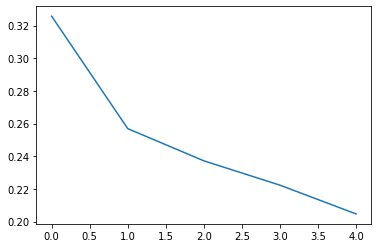

In [21]:
%matplotlib inline
plt.plot(info['test errors'])